In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

data = pd.read_csv('/content/Fuel_Consumption.csv')
data

,MODELYEAR,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [3]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
data['MODEL'].dtypes  

dtype('O')

In [7]:
data['MODEL'] = data['MODEL'].astype('category')
data['MODEL']

CategoricalDtype(categories=['1500 (MDS)', '1500 4X4 (MDS)', '1500 4X4 DIESEL',
                  '1500 4X4 FFV', '1500 DIESEL', '1500 FFV', '1500 HFE',
                  '200 CONVERTIBLE', '200 CONVERTIBLE FFV', '200 SEDAN',
                  ...
                  'YUKON DENALI XL AWD', 'YUKON XL', 'YUKON XL 4WD',
                  'Z4 sDRIVE28i', 'Z4 sDRIVE35i', 'Z4 sDRIVE35is', 'iQ', 'tC',
                  'xB', 'xD'],
                 ordered=False)

In [16]:
data['MODEL_Cat'] = data['MODEL'].cat.codes
data['MODEL_Cat']

0       329
1       329
2       330
3       389
4       483
       ... 
1062    624
1063    624
1064    625
1065    625
1066    626
Name: MODEL_Cat, Length: 1067, dtype: int16

In [19]:
X = data.iloc[:,7:11]
X

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,9.9,6.7,8.5,33
1,11.2,7.7,9.6,29
2,6.0,5.8,5.9,48
3,12.7,9.1,11.1,25
4,12.1,8.7,10.6,27
...,...,...,...,...
1062,13.4,9.8,11.8,24
1063,13.2,9.5,11.5,25
1064,13.4,9.8,11.8,24
1065,12.9,9.3,11.3,25


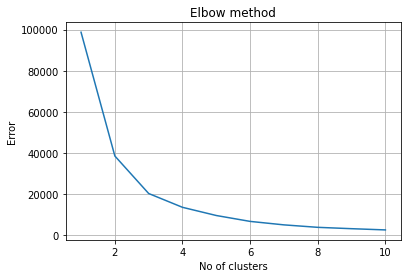

In [21]:
Error =[]  #create a list
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.grid('on')
plt.show()

In [22]:
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(X)  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0, 0.5, 'FUELCONSUMPTION_HWY')

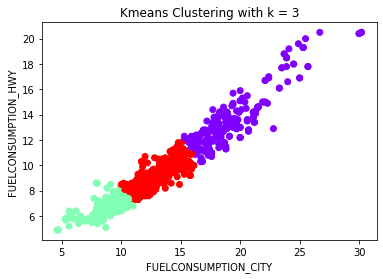

In [25]:
x_axis = X['FUELCONSUMPTION_CITY']
y_axis = X['FUELCONSUMPTION_HWY']
plt.scatter(x_axis, y_axis, c=kmeans3.labels_, cmap='rainbow' )
plt.title('Kmeans Clustering with k = 3')
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('FUELCONSUMPTION_HWY')